# 📊 Customer Churn Analysis & Prediction

**Author:** NANCY  
**LinkedIn:** https://www.linkedin.com/in/nancy2601/  
## 📌 Project Objective
Analyze telecom customer churn to:
- Understand key drivers and patterns.
- Visualize trends with clear charts.
- Build predictive models to identify high-risk customers.
- Deliver actionable insights to help reduce customer loss.
## 📂 Dataset
- **Source:** Telco Customer Churn (IBM Sample Dataset)
- **Records:** ~7,000 customers
- **Features:** 21 columns — demographics, services used, account info, and churn label.

✅ Step 1 — Data Loading & Initial Checks

In [9]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(df.shape)
print(df.head())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

📊 Next Step — Quick Data Check

In [10]:
# 📌 Data Types
print(df.dtypes)

# 📌 Missing Values
print("\nMissing values:\n", df.isnull().sum())

# 📌 Unique Values
print("\nUnique values per column:\n")
print(df.nunique())


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
Paymen

🧹 Next Step — Data Cleaning

In [11]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for new missing values
print(df.isnull().sum())

# Look at rows where TotalCharges is NaN
print(df[df['TotalCharges'].isnull()])


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVO

In [12]:
df = df[df['TotalCharges'].notnull()]
df = df.reset_index(drop=True)

print(df.isnull().sum())
print(df.shape)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
(7032, 21)


📊 Next Step: Fix Data Types

In [13]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Confirm the change
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


 Exploratory Data Analysis (EDA)

📊 Step 1: Descriptive Statistics

In [14]:
# Descriptive stats for numerical columns
print(df.describe())

# Descriptive stats for categorical columns
print(df.describe(include='object'))


       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7032   7032    7032       7032         7032          7032   
unique        7032      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3549    3639       4933         6352          3385   

       InternetService OnlineSecurity OnlineBack

📊 Step 2: Visualize Overall Churn Rate


Question1 What is the overall churn rate?

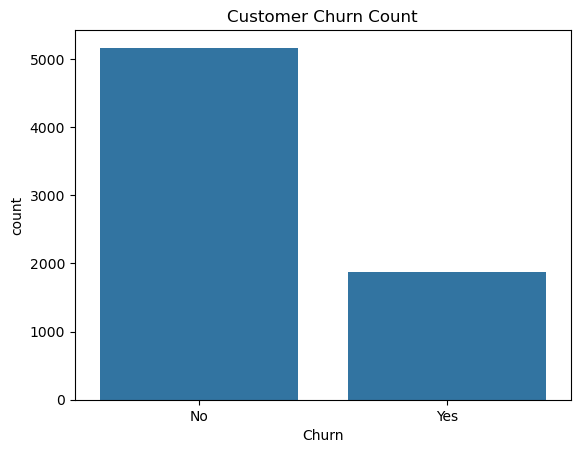

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for Churn
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Count')
plt.show()

# Calculate churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


📊 Step 3: Visualize Churn vs. Contract Type

Question 2 How does churn vary by contract type?

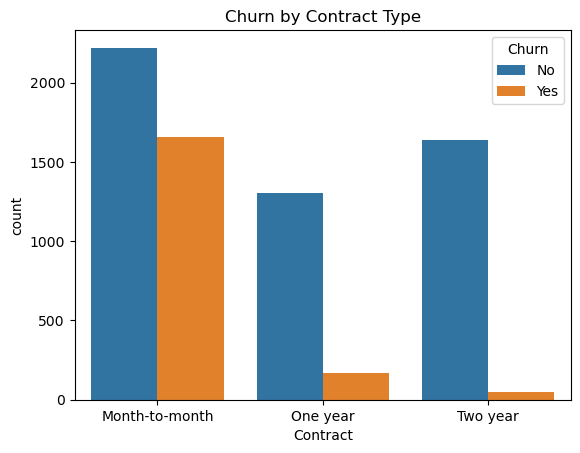

In [18]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


✅ Question 3: Churn Rate by Payment Method

               PaymentMethod Churn  Count  Percentage
0  Bank transfer (automatic)    No   1284   83.268482
1  Bank transfer (automatic)   Yes    258   16.731518
2    Credit card (automatic)    No   1289   84.746877
3    Credit card (automatic)   Yes    232   15.253123
4           Electronic check    No   1294   54.714588
5           Electronic check   Yes   1071   45.285412
6               Mailed check    No   1296   80.798005
7               Mailed check   Yes    308   19.201995


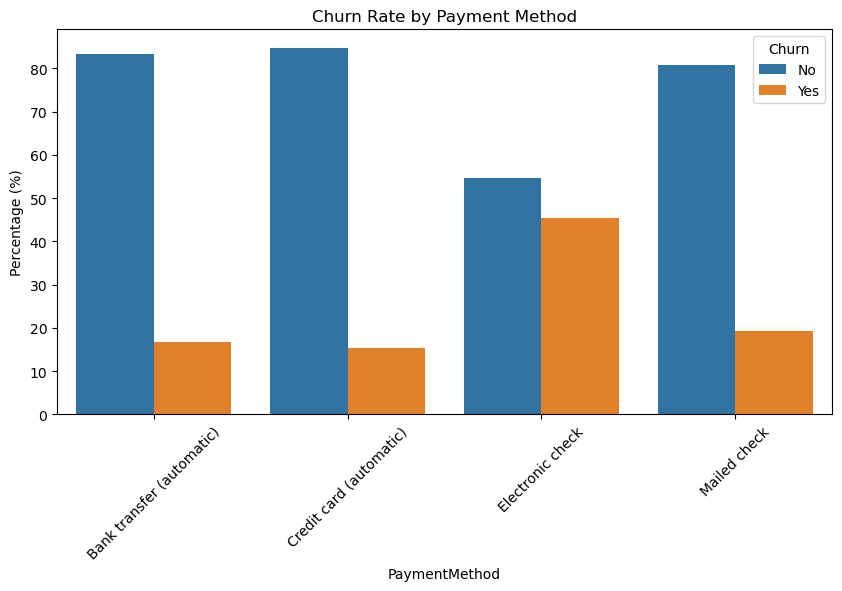

In [20]:
# Group by PaymentMethod and Churn
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each payment method
payment_churn['Percentage'] = payment_churn.groupby('PaymentMethod')['Count'].transform(lambda x: 100 * x / x.sum())

print(payment_churn)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='PaymentMethod', y='Percentage', hue='Churn', data=payment_churn)
plt.title('Churn Rate by Payment Method')
plt.xticks(rotation=45)
plt.ylabel('Percentage (%)')
plt.show()


✅ Question 4: Churn Rate for Paperless Billing

In [22]:
# Group by PaperlessBilling and Churn
paperless_churn = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each PaperlessBilling group
paperless_churn['Percentage'] = paperless_churn.groupby('PaperlessBilling')['Count'].transform(lambda x: 100 * x / x.sum())

print(paperless_churn)


  PaperlessBilling Churn  Count  Percentage
0               No    No   2395   83.624302
1               No   Yes    469   16.375698
2              Yes    No   2768   66.410749
3              Yes   Yes   1400   33.589251


Visualize

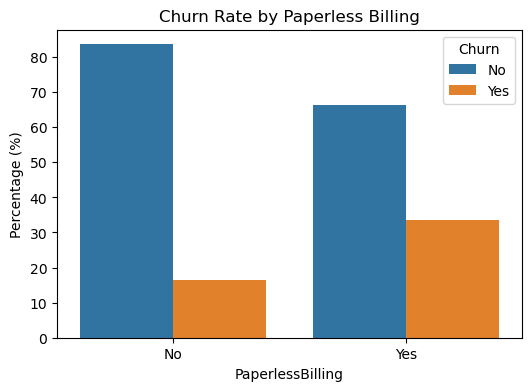

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='PaperlessBilling', y='Percentage', hue='Churn', data=paperless_churn)
plt.title('Churn Rate by Paperless Billing')
plt.ylabel('Percentage (%)')
plt.show()


Question 5: What is the relationship between tenure and churn probability?

✅ Step 1: Create tenure bins

In [25]:
# Create tenure bins
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0–12', '13–24', '25–36', '37–48', '49–60', '61–72']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

# Group by tenure group and churn
tenure_churn = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='Count')

# Calculate percentage churn within each tenure group
tenure_churn['Percentage'] = tenure_churn.groupby('tenure_group')['Count'].transform(lambda x: 100 * x / x.sum())

print(tenure_churn)


   tenure_group Churn  Count  Percentage
0          0–12    No   1138   52.321839
1          0–12   Yes   1037   47.678161
2         13–24    No    730   71.289062
3         13–24   Yes    294   28.710938
4         25–36    No    652   78.365385
5         25–36   Yes    180   21.634615
6         37–48    No    617   80.971129
7         37–48   Yes    145   19.028871
8         49–60    No    712   85.576923
9         49–60   Yes    120   14.423077
10        61–72    No   1314   93.390192
11        61–72   Yes     93    6.609808


C:\Users\Mamta\AppData\Local\Temp\ipykernel_7428\3611141201.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby(['tenure_group', 'Churn']).size().reset_index(name='Count')
C:\Users\Mamta\AppData\Local\Temp\ipykernel_7428\3611141201.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn['Percentage'] = tenure_churn.groupby('tenure_group')['Count'].transform(lambda x: 100 * x / x.sum())


✅ Step 2: Visualize

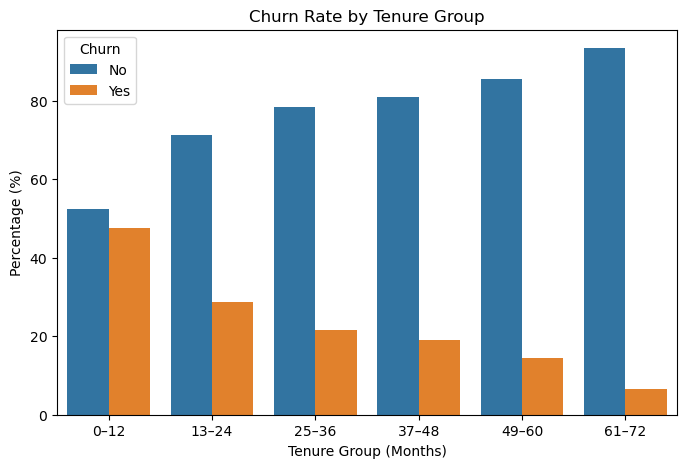

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='tenure_group', y='Percentage', hue='Churn', data=tenure_churn)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Percentage (%)')
plt.show()


Question 6?
👉 Does age group (SeniorCitizen) affect churn rate?

In [27]:
# Group by SeniorCitizen and Churn
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each age group
senior_churn['Percentage'] = senior_churn.groupby('SeniorCitizen')['Count'].transform(lambda x: 100 * x / x.sum())

print(senior_churn)


   SeniorCitizen Churn  Count  Percentage
0              0    No   4497   76.349745
1              0   Yes   1393   23.650255
2              1    No    666   58.318739
3              1   Yes    476   41.681261


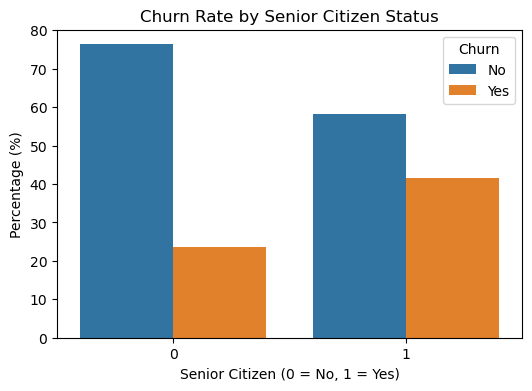

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x='SeniorCitizen', y='Percentage', hue='Churn', data=senior_churn)
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.show()


Question 7: Are there differences in churn rates by gender?

Calculate and Group 

In [29]:
# Group by gender and Churn
gender_churn = df.groupby(['gender', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each gender group
gender_churn['Percentage'] = gender_churn.groupby('gender')['Count'].transform(lambda x: 100 * x / x.sum())

print(gender_churn)


   gender Churn  Count  Percentage
0  Female    No   2544   73.040482
1  Female   Yes    939   26.959518
2    Male    No   2619   73.795435
3    Male   Yes    930   26.204565


Visualize 

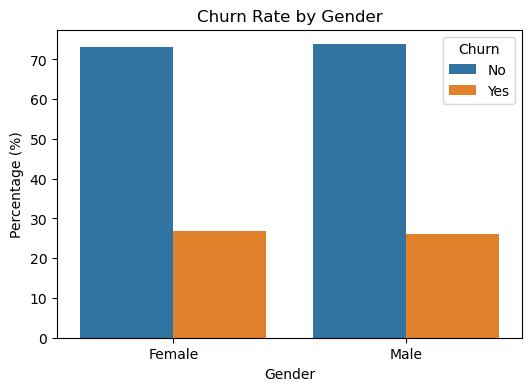

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='Percentage', hue='Churn', data=gender_churn)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.show()

Question 8: Do customers with dependents or partners churn less frequently?

 Group and calculate churn for Partner 

In [33]:
# Group by Partner and Churn
partner_churn = df.groupby(['Partner', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each Partner group
partner_churn['Percentage'] = partner_churn.groupby('Partner')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Partner:")
print(partner_churn)


Churn by Partner:
  Partner Churn  Count  Percentage
0      No    No   2439   67.023908
1      No   Yes   1200   32.976092
2     Yes    No   2724   80.282935
3     Yes   Yes    669   19.717065


Visualize 

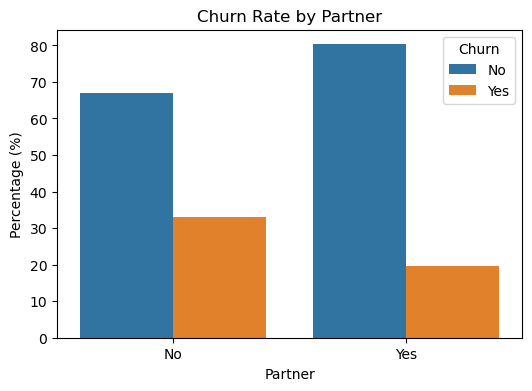

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='Partner', y='Percentage', hue='Churn', data=partner_churn)
plt.title('Churn Rate by Partner')
plt.xlabel('Partner')
plt.ylabel('Percentage (%)')
plt.show()


Group and calculate churn for Dependents

In [35]:
# Group by Dependents and Churn
dependents_churn = df.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each Dependents group
dependents_churn['Percentage'] = dependents_churn.groupby('Dependents')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Dependents:")
print(dependents_churn)

Churn by Dependents:
  Dependents Churn  Count  Percentage
0         No    No   3390   68.720860
1         No   Yes   1543   31.279140
2        Yes    No   1773   84.468795
3        Yes   Yes    326   15.531205


Visualize Dependents

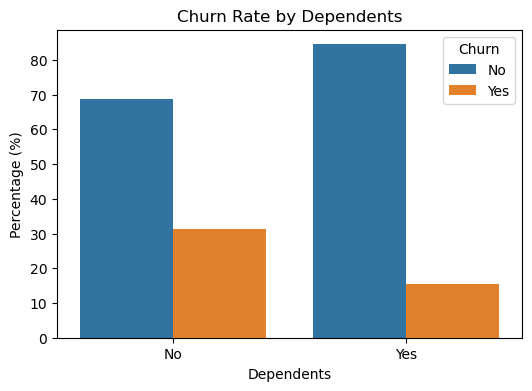

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x='Dependents', y='Percentage', hue='Churn', data=dependents_churn)
plt.title('Churn Rate by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Percentage (%)')
plt.show()

 Question 9: How does Internet Service type affect churn rate?

✅ Step 1 — Group by Internet Service and Churn

In [38]:
# Group by InternetService and Churn
internet_churn = df.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each Internet Service group
internet_churn['Percentage'] = internet_churn.groupby('InternetService')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Internet Service:")
print(internet_churn)


Churn by Internet Service:
  InternetService Churn  Count  Percentage
0             DSL    No   1957   81.001656
1             DSL   Yes    459   18.998344
2     Fiber optic    No   1799   58.107235
3     Fiber optic   Yes   1297   41.892765
4              No    No   1407   92.565789
5              No   Yes    113    7.434211


✅ Step 2 — Visualize

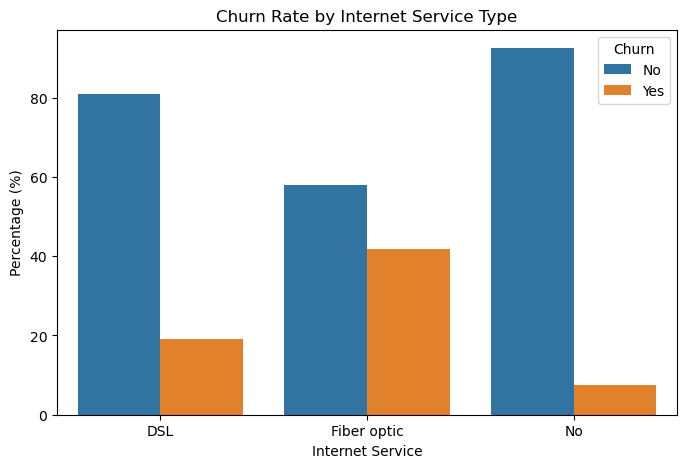

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x='InternetService', y='Percentage', hue='Churn', data=internet_churn)
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Percentage (%)')
plt.show()

 Question 10: Are customers with additional services (Online Security, Tech Support) less likely to churn?

✅ Step 1 — Group by Online Security and Churn

In [42]:
# Group by OnlineSecurity and Churn
security_churn = df.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each Online Security group
security_churn['Percentage'] = security_churn.groupby('OnlineSecurity')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Online Security service:")
print(security_churn)


Churn by Online Security service:
        OnlineSecurity Churn  Count  Percentage
0                   No    No   2036   58.221333
1                   No   Yes   1461   41.778667
2  No internet service    No   1407   92.565789
3  No internet service   Yes    113    7.434211
4                  Yes    No   1720   85.359801
5                  Yes   Yes    295   14.640199


✅ Step 2 — Visualize

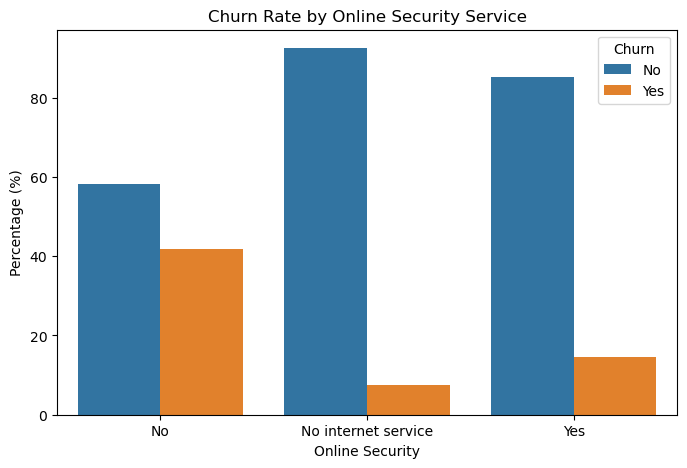

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(x='OnlineSecurity', y='Percentage', hue='Churn', data=security_churn)
plt.title('Churn Rate by Online Security Service')
plt.xlabel('Online Security')
plt.ylabel('Percentage (%)')
plt.show()

✅ Step 3 — Repeat for Tech Support

In [45]:
# Group by TechSupport and Churn
techsupport_churn = df.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each Tech Support group
techsupport_churn['Percentage'] = techsupport_churn.groupby('TechSupport')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Tech Support service:")
print(techsupport_churn)

Churn by Tech Support service:
           TechSupport Churn  Count  Percentage
0                   No    No   2026   58.352535
1                   No   Yes   1446   41.647465
2  No internet service    No   1407   92.565789
3  No internet service   Yes    113    7.434211
4                  Yes    No   1730   84.803922
5                  Yes   Yes    310   15.196078


✅ Visualize Tech Support

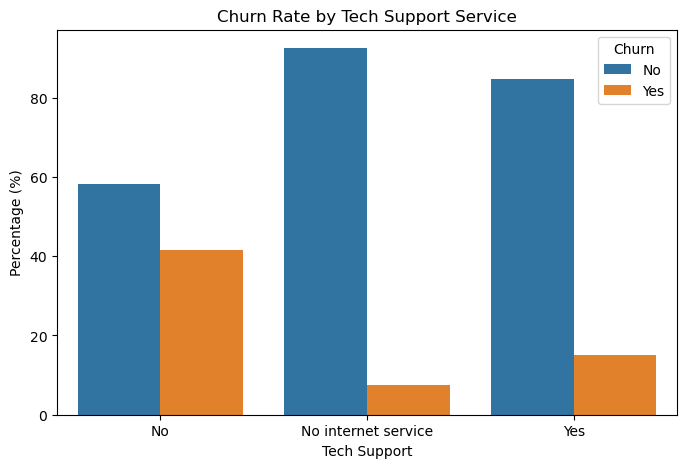

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(x='TechSupport', y='Percentage', hue='Churn', data=techsupport_churn)
plt.title('Churn Rate by Tech Support Service')
plt.xlabel('Tech Support')
plt.ylabel('Percentage (%)')
plt.show()

Question 11: Does having multiple lines or phone service affect churn?

✅ Step 1 — Analyze PhoneService vs. Churn

In [47]:
# Group by PhoneService and Churn
phone_churn = df.groupby(['PhoneService', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each PhoneService group
phone_churn['Percentage'] = phone_churn.groupby('PhoneService')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Phone Service:")
print(phone_churn) 

Churn by Phone Service:
  PhoneService Churn  Count  Percentage
0           No    No    510   75.000000
1           No   Yes    170   25.000000
2          Yes    No   4653   73.252519
3          Yes   Yes   1699   26.747481


✅ Step 2 — Visualize PhoneService

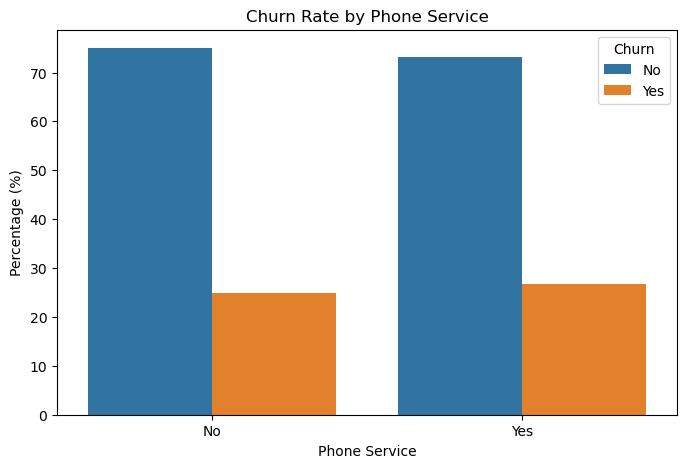

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='PhoneService', y='Percentage', hue='Churn', data=phone_churn)
plt.title('Churn Rate by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Percentage (%)')
plt.show()

✅ Step 3 — Analyze MultipleLines vs. Churn

In [49]:
# Group by MultipleLines and Churn
lines_churn = df.groupby(['MultipleLines', 'Churn']).size().reset_index(name='Count')

# Calculate percentage within each MultipleLines group
lines_churn['Percentage'] = lines_churn.groupby('MultipleLines')['Count'].transform(lambda x: 100 * x / x.sum())

print("Churn by Multiple Lines:")
print(lines_churn)


Churn by Multiple Lines:
      MultipleLines Churn  Count  Percentage
0                No    No   2536   74.918759
1                No   Yes    849   25.081241
2  No phone service    No    510   75.000000
3  No phone service   Yes    170   25.000000
4               Yes    No   2117   71.351534
5               Yes   Yes    850   28.648466


✅ Step 4 — Visualize MultipleLines

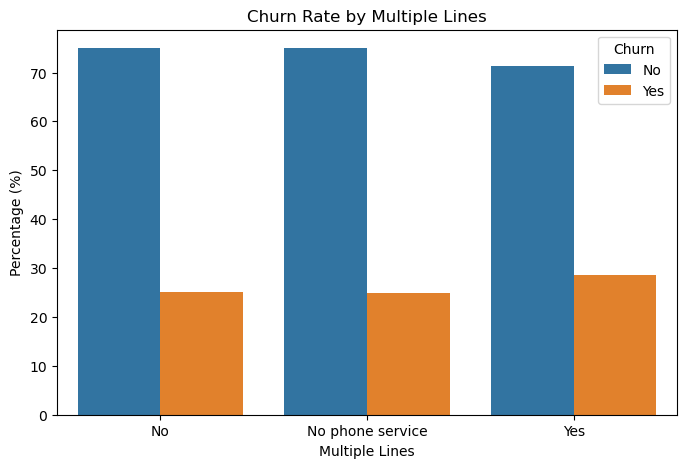

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x='MultipleLines', y='Percentage', hue='Churn', data=lines_churn)
plt.title('Churn Rate by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Percentage (%)')
plt.show()

 Question 12: Which features are most correlated with Churn? 📈✨

✅ Step 1 — Encode the Churn column

In [52]:
# Copy the DataFrame to avoid modifying the original
df_corr = df.copy()

# Encode 'Churn' to 0 and 1
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Check that it worked
print(df_corr['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


✅ Step 2 — Convert categorical columns if needed

In [53]:
# Convert categorical features to dummy variables
df_corr_encoded = pd.get_dummies(df_corr, drop_first=True)

print(df_corr_encoded.head())

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0              0       1           29.85         29.85      0   
1              0      34           56.95       1889.50      0   
2              0       2           53.85        108.15      1   
3              0      45           42.30       1840.75      0   
4              0       2           70.70        151.65      1   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  ...  Contract_Two year  \
0                  False                  False  ...              False   
1             

✅ Step 3 — Compute correlations

In [55]:
# Calculate correlation matrix
corr_matrix = df_corr_encoded.corr()

# Get correlations with 'Churn', sort descending
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

print("Correlation with Churn:")
print(churn_corr)

Correlation with Churn:
Churn                                   1.000000
InternetService_Fiber optic             0.307463
PaymentMethod_Electronic check          0.301455
MonthlyCharges                          0.192858
PaperlessBilling_Yes                    0.191454
                                          ...   
DeviceProtection_No internet service   -0.227578
OnlineBackup_No internet service       -0.227578
OnlineSecurity_No internet service     -0.227578
Contract_Two year                      -0.301552
tenure                                 -0.354049
Name: Churn, Length: 7067, dtype: float64


✅ Step 4 — Visualize the top correlations

C:\Users\Mamta\AppData\Local\Temp\ipykernel_7428\2659839080.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')


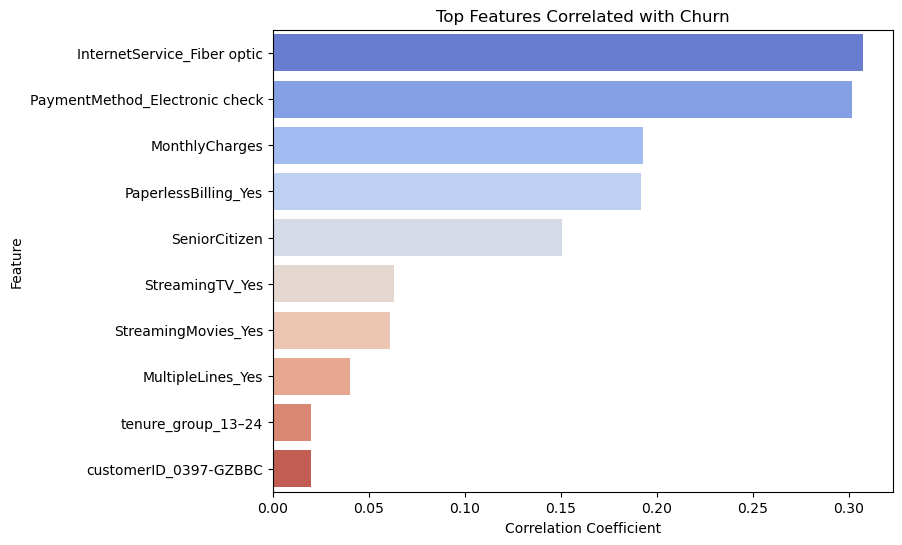

In [56]:
# Plot top positive and negative correlations
top_features = churn_corr[1:11]  # Skip the first one since it’s Churn with itself

plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette='coolwarm')
plt.title('Top Features Correlated with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

✅ Question 13: What is the overall churn rate?

In [57]:
total_customers = df.shape[0]
print("Total customers:", total_customers)


Total customers: 7032


📊 Step 2 — Count number of churned customers

In [58]:
num_churned = df[df['Churn'] == 'Yes'].shape[0]
print("Number of churned customers:", num_churned)


Number of churned customers: 1869


📊 Step 3 — Calculate churn rate

In [59]:
churn_rate = (num_churned / total_customers) * 100
print(f"Churn Rate: {churn_rate:.2f}%")


Churn Rate: 26.58%


 Visualize it

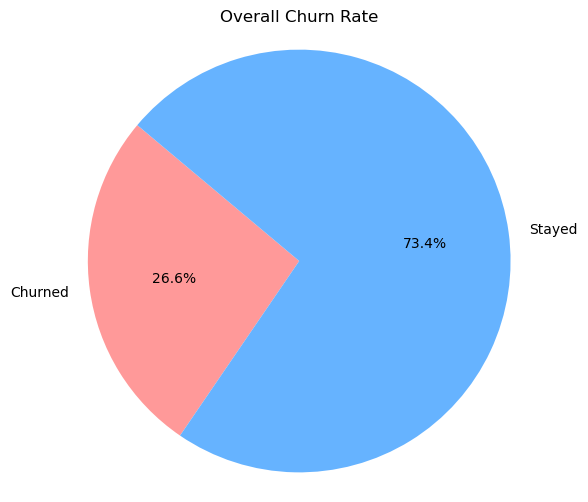

In [60]:
labels = ['Churned', 'Stayed']
sizes = [num_churned, total_customers - num_churned]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Churn Rate')
plt.axis('equal')
plt.show()


Question 14: Any interesting insights from numerical features? 🔍📈

📊 Step 1 — Compare average TotalCharges for churned vs. retained

In [62]:
total_charges_comparison = df.groupby('Churn')['TotalCharges'].agg(['count', 'mean', 'median', 'min', 'max'])
print(total_charges_comparison)


       count         mean   median    min      max
Churn                                             
No      5163  2555.344141  1683.60  18.80  8672.45
Yes     1869  1531.796094   703.55  18.85  8684.80


📊 Step 2 — Visualize the distributions

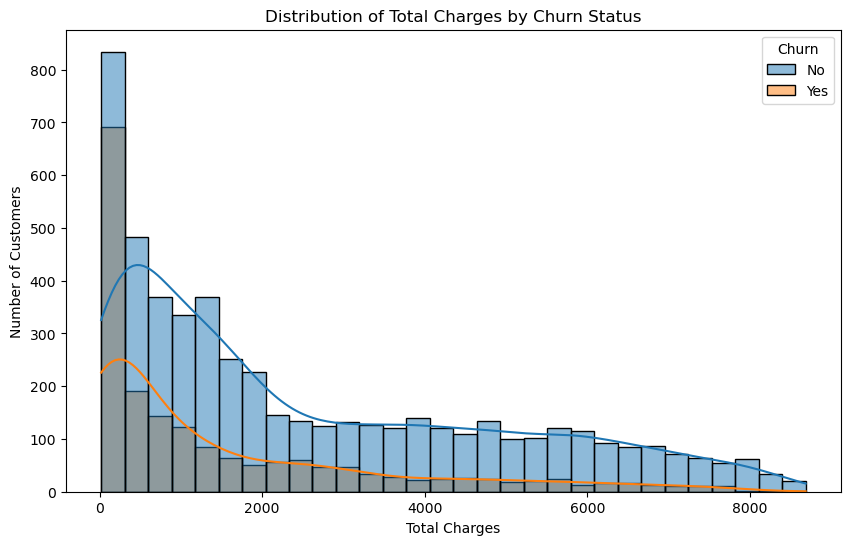

In [64]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, kde=True)
plt.title('Distribution of Total Charges by Churn Status')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()


📊 Step 3 — (Optional) Run a t-test to see if the difference is statistically significant

In [65]:
from scipy.stats import ttest_ind

# Split data
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

# T-test
t_stat, p_value = ttest_ind(churn_yes, churn_no, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: -17.0688, P-value: 0.0000


✅ Question 15: Which customer segment contributes the most revenue but has the highest churn risk?

📊 Step 1 — Create a new column: Total Revenue per customer

In [66]:
# Total revenue is already in TotalCharges
# Double-check data types
print(df['TotalCharges'].dtype)

float64


📊 Step 2 — Analyze by a key segment: e.g., Contract Type

In [67]:
# Average revenue and churn rate by Contract
segment_revenue = df.groupby('Contract').agg(
    total_customers = ('customerID', 'count'),
    avg_total_charges = ('TotalCharges', 'mean'),
    churn_rate = ('Churn', lambda x: (x == 'Yes').mean() * 100)
).reset_index()

print(segment_revenue)


         Contract  total_customers  avg_total_charges  churn_rate
0  Month-to-month             3875        1369.254581   42.709677
1        One year             1472        3034.683084   11.277174
2        Two year             1685        3728.933947    2.848665


📊 Step 3 — Visualize it

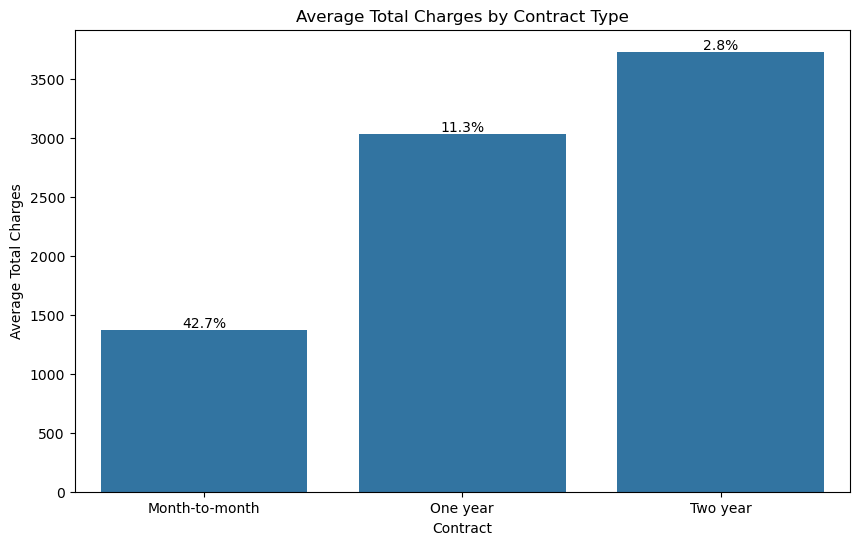

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(data=segment_revenue, x='Contract', y='avg_total_charges')
plt.title('Average Total Charges by Contract Type')
plt.ylabel('Average Total Charges')

# Add churn rate labels
for idx, row in segment_revenue.iterrows():
    plt.text(idx, row['avg_total_charges']+20, f"{row['churn_rate']:.1f}%", ha='center')

plt.show()


In [70]:
## 📌 Conclusion

This EDA revealed key drivers of customer churn, such as contract type, payment methods, tenure, and optional services. These insights will help the company design better retention strategies and develop predictive churn models.

**Next Steps:**
- Build and evaluate machine learning models to predict churn.
- Develop targeted marketing and customer support actions.

---

✅ **Project by [Your Name]**  
🔗 [GitHub](https://github.com/yourusername) | [LinkedIn](https://linkedin.com/in/yourprofile)


SyntaxError: invalid character '✅' (U+2705) (1743388627.py, line 11)